## HeartFailure data preprocessing

### Importing necessary libraries

In [1]:
import os
import sys
current_directory=os.getcwd()
parent_directory=os.path.dirname(current_directory)
sys.path.append(parent_directory)


In [2]:
import numpy as np
from library.generators.NextConvGeN import NextConvGeN


2024-01-31 12:05:06.330305: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-31 12:05:06.330323: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
from fdc.clustering import *

In [4]:
import pandas as pd

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Importing data

In [6]:
data=pd.read_csv('Student_Mental_health.csv')

In [7]:
np.random.seed(42)
data=data.sample(frac=1)

In [8]:
data.drop(['Timestamp'],axis=1, inplace=True)

In [9]:
data['What is your course?'].unique()

array(['Radiography', 'BCS', 'KOE', 'MHSC', 'Engineering', 'TAASL',
       'Psychology', 'BIT', 'Business Administration', 'Human Sciences ',
       'Mathemathics', 'BENL', 'Biotechnology', 'Usuluddin ',
       'Biomedical science', 'Irkhs', 'Koe', 'Engine',
       'Pendidikan Islam ', 'koe', 'Accounting ', 'Diploma Nursing',
       'Marine science', 'Fiqh', 'Banking Studies', 'CTS', 'Laws', 'ENM',
       'KIRKHS', 'Human Resources', 'Pendidikan islam', 'Econs', 'Law',
       'Kirkhs', 'ALA', 'Malcom', 'Kop', 'Nursing ', 'Communication ',
       'DIPLOMA TESL', 'Islamic Education', 'Benl', 'engin', 'psychology',
       'Islamic education', 'Pendidikan Islam', 'Fiqh fatwa ', 'IT',
       'KENMS'], dtype=object)

In [10]:
data['What is your course?'].replace(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'],[0, 1, 2, 3, 4,
       5, 6, 7, 8,
       9, 10, 11, 12, 13,
       14,15, 16,3,
       17, 18, 19, 20, 21,
       22, 14, 17, 23, 23, 24, 25,
       20, 26, 27, 28, 29, 30,
       31, 32, 33,
       5, 34, 9, 35,
       36, 14, 35, 1, 33,
       5],inplace=True)

In [11]:
data['Choose your gender'].replace(['Female', 'Male'],[0, 1],inplace=True)

In [12]:
data['Choose your gender'].unique()

array([1, 0])

In [13]:
data['Choose your gender'].replace(['Female', 'Male'],[0, 1],inplace=True)

In [14]:
data['Your current year of Study'].unique()

array(['year 1', 'Year 3', 'Year 2', 'year 2', 'year 4', 'year 3',
       'Year 1'], dtype=object)

In [15]:
data['Your current year of Study'].replace(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2','Year 3'], [0,1,0,2,3,1,2], inplace=True)

In [16]:
data['Marital status'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
data['Marital status'].replace(['No', 'Yes'], [0,1], inplace=True)

In [18]:
data[ 'Did you seek any specialist for a treatment?'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
data['Did you seek any specialist for a treatment?'].replace(['No', 'Yes'], [0,1], inplace=True)

In [20]:
data['Do you have Depression?'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
data['Do you have Depression?'].replace(['Yes', 'No'], [1,0], inplace=True)

In [22]:
data['Do you have Anxiety?'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
data['Do you have Anxiety?'].replace(['No', 'Yes'], [0,1], inplace=True)

In [24]:
data['Do you have Panic attack?'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
data['Do you have Panic attack?'].replace(['No', 'Yes'], [0,1], inplace=True)

In [26]:
data.isna().sum()

Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [27]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [28]:
data.isna().sum()

Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [29]:
data['What is your CGPA?'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '0 - 1.99',
       '2.00 - 2.49', '3.50 - 4.00 '], dtype=object)

In [30]:
replacement_dict = {
    '3.00 - 3.49': np.mean([3.00, 3.49]),
    '3.50 - 4.00': np.mean([3.50, 4.00]),
    '3.50 - 4.00 ': np.mean([3.50, 4.00]),
    '2.50 - 2.99': np.mean([2.50, 2.99]),
    '2.00 - 2.49': np.mean([2.00, 2.49]),
    '0 - 1.99': np.mean([0, 1.99])
}

data['What is your CGPA?'].replace(replacement_dict, inplace=True)


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 84 to 51
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Choose your gender                            101 non-null    int64  
 1   Age                                           101 non-null    float64
 2   What is your course?                          101 non-null    int64  
 3   Your current year of Study                    101 non-null    int64  
 4   What is your CGPA?                            101 non-null    float64
 5   Marital status                                101 non-null    int64  
 6   Do you have Depression?                       101 non-null    int64  
 7   Do you have Anxiety?                          101 non-null    int64  
 8   Do you have Panic attack?                     101 non-null    int64  
 9   Did you seek any specialist for a treatment?  101 non-null    int

In [32]:
data.drop_duplicates(inplace=True, ignore_index=True)

output_file_path=os.path.join(parent_directory,"PreprocessedDatasets/StudentsMentalHealth.csv")
data.to_csv(output_file_path, index=False)

In [33]:
np.random.seed(42)
data=data.sample(frac=1)

### UMAP on entire data

In [34]:
from fdc.fdc import feature_clustering

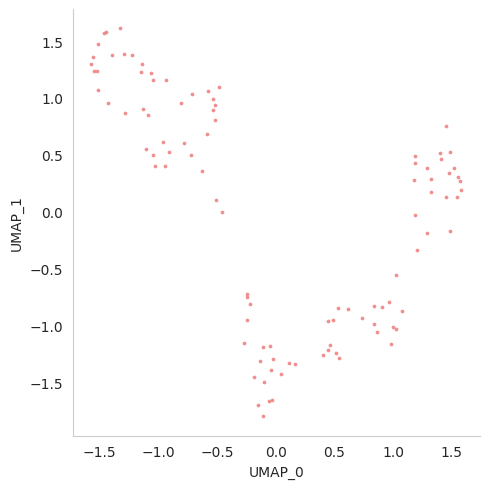

In [35]:
np.random.seed(42)
umap_emb=feature_clustering(30,0.1,'euclidean',data,True)

### Feature-type Distributed Clustering (FDC)

In [36]:
cont_list=['Age','What is your CGPA?']

nom_list=['What is your course?','Choose your gender','Your current year of Study','Marital status']

ord_list=['Do you have Depression?','Do you have Anxiety?','Do you have Panic attack?', 'Did you seek any specialist for a treatment?']

target = None


In [37]:
output_file_path=os.path.join(parent_directory,"PreprocessedDatasets/StudentsMentalHealth.json")

In [38]:
import json

features = {
    "cont_list": cont_list,
    "nom_list": nom_list,
    "ord_list": ord_list,
    "target": target
}

with open(output_file_path, "w") as json_file:
    json.dump(features, json_file)

FDC.normalize (init): 0.00001 / 0.000s


FDC.normalize (clustering CONT): 0.90719 / 0.907s


FDC.normalize (clustering ORD): 1.33698 / 2.244s
FDC.normalize (clustering NOM): 0.00004 / 2.244s
FDC.normalize (concat): 0.00001 / 2.244s


FDC.normalize (umap 5 -> 2): 0.85839 / 3.103s
FDC.normalize (array -> DataFrame): 0.00025 / 3.103s


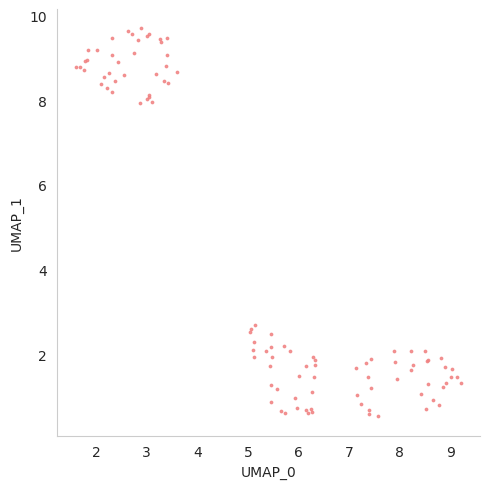

FDC.normalize (plotting): 0.41193 / 3.515s
FDC.normalize (array -> DataFrame): 0.00017 / 3.515s
FDC.normalize (total): 0.00001 / 3.515s


In [39]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)

fdc = FDC(clustering_cont=Clustering('euclidean',30,0.01)
          , clustering_ord=Clustering(canberra_modified,30,0.01)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(data,cont_list=cont_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

### Clustering using K-means

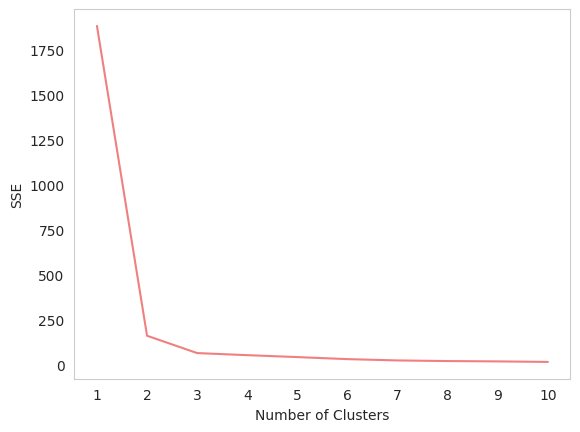

In [40]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(FDC_emb_low)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [41]:
def find_optimal_cluster(FDC_emb_low):
    silhouette_scores = []

    for n_clusters in list(range(2, 9)):
        km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=100, random_state=42)

        km.fit(FDC_emb_low)

        labels = km.labels_

        # Compute the silhouette score
        silhouette_avg = silhouette_score(FDC_emb_low, labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

In [42]:
find_optimal_cluster(FDC_emb_low)

[0.8213758,
 0.69249207,
 0.6252626,
 0.6256647,
 0.45149276,
 0.4955291,
 0.49156472]

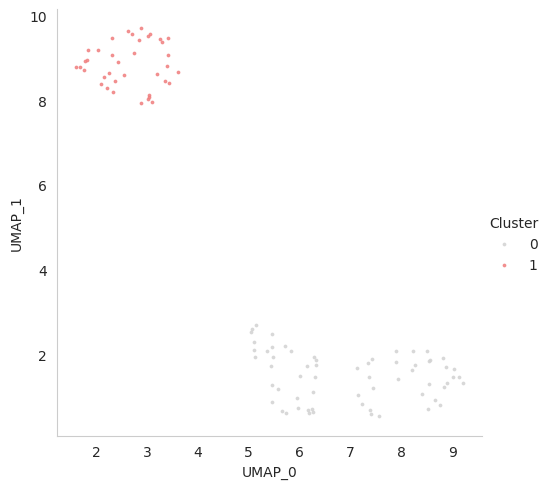

In [43]:
from fdc.clustering import *
np.random.seed(42)
clustering=Clustering(FDC_emb_low,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(2)

In [44]:
cluster_counts

array([63, 38])

In [45]:
data['Target']=cluster_list

In [46]:
output_file_path=os.path.join(parent_directory,"PreprocessedDatasets/SSStudentsMentalHealth.csv")
data.to_csv(output_file_path, index=False)

In [47]:
data

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Target
84,0,24.0,6,3,3.750,0,0,0,0,0,1
55,0,18.0,17,0,3.750,0,0,0,0,0,0
66,0,18.0,28,0,3.750,0,1,0,0,0,0
67,0,19.0,0,0,3.750,0,0,1,0,0,0
45,1,18.0,0,1,3.245,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
60,0,18.0,3,2,3.245,0,1,1,0,0,0
71,0,24.0,32,1,3.750,1,1,1,1,0,1
14,0,18.0,30,1,3.245,0,0,0,1,0,0
92,1,24.0,2,2,3.750,0,0,1,0,0,1
